<a href="https://colab.research.google.com/github/SergeiVKalinin/MSE_Spring_2026/blob/main/Module%202/7_SymbolicRegression_Ising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tutorial notebook for the Spring 2026 UTK MSE 510/420
- Instructor Sergei V. Kalinin, sergei2@utk.edu

# Installing PySR

In [1]:
'''
# Install Julia
!wget https://julialang-s3.julialang.org/bin/linux/x64/1.6/julia-1.6.1-linux-x86_64.tar.gz
!tar -xvzf julia-1.6.1-linux-x86_64.tar.gz
!mv julia-1.6.1 /opt/
!ln -s /opt/julia-1.6.1/bin/julia /usr/local/bin/julia

# Test Julia installation
!julia -e 'using InteractiveUtils; versioninfo()'

# Install IJulia to get the Julia Kernel
!julia -e 'import Pkg; Pkg.add("IJulia")'
'''

'\n# Install Julia\n!wget https://julialang-s3.julialang.org/bin/linux/x64/1.6/julia-1.6.1-linux-x86_64.tar.gz\n!tar -xvzf julia-1.6.1-linux-x86_64.tar.gz\n!mv julia-1.6.1 /opt/\n!ln -s /opt/julia-1.6.1/bin/julia /usr/local/bin/julia\n\n# Test Julia installation\n!julia -e \'using InteractiveUtils; versioninfo()\'\n\n# Install IJulia to get the Julia Kernel\n!julia -e \'import Pkg; Pkg.add("IJulia")\'\n'

In [2]:
!pip install pysr #==0.16

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 884.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.3/99.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.7/251.7 kB 8.0 MB/s eta 0:00:00


In [3]:
import pysr
# pysr.install()

[juliapkg] Found dependencies: /usr/local/lib/python3.12/dist-packages/juliapkg/juliapkg.json
[juliapkg] Found dependencies: /usr/local/lib/python3.12/dist-packages/pysr/juliapkg.json
[juliapkg] Found dependencies: /usr/local/lib/python3.12/dist-packages/juliacall/juliapkg.json
[juliapkg] Locating Julia 1.10.3 - 1.11
[juliapkg] Using Julia 1.11.5 at /usr/local/bin/julia
[juliapkg] Using Julia project at /root/.julia/environments/pyjuliapkg
[juliapkg] Writing Project.toml:
           | [deps]
           | SymbolicRegression = "8254be44-1295-4e6a-a16d-46603ac705cb"
           | Serialization = "9e88b42a-f829-5b0c-bbe9-9e923198166b"
           | PythonCall = "6099a3de-0909-46bc-b1f4-468b9a2dfc0d"
           | OpenSSL_jll = "458c3c95-2e84-50aa-8efc-19380b2a3a95"
           | 
           | [compat]
           | SymbolicRegression = "~1.11"
           | Serialization = "^1"
           | PythonCall = "=0.9.26"
           | OpenSSL_jll = "~3.0"
[juliapkg] Installing packages:
           | impo

# Regression-optimization

The code from: https://towardsdatascience.com/optimization-with-surrogate-models-via-symbolic-regression-38f9b7536a36

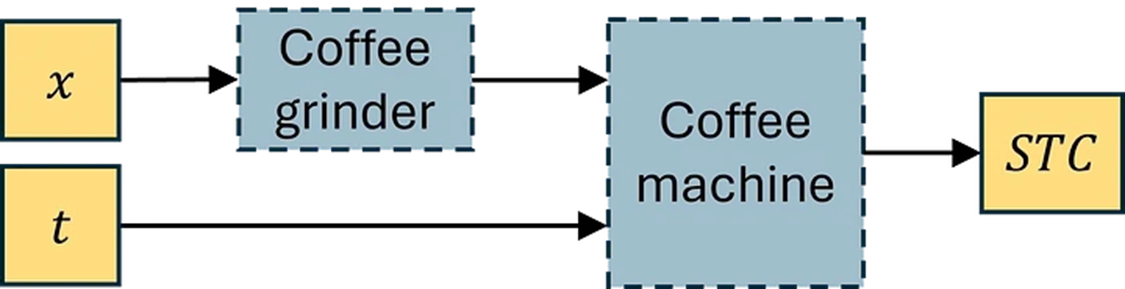

In [4]:
# Get the bounds of the data
xbounds = [0.05, 1] # mm
tbounds = [5, 60]   # seconds

# Get some samples [x,t]=[particle size, brewing time]
samples = [[0.05, 10], [0.05, 50], [0.09, 15], [0.2, 25], [0.3, 35], [0.3, 45], [0.5, 15], [1, 55], [0.6, 55], [0.8, 15], [0.95, 10], [0.8, 30]]

In [5]:
# Design the scaling function
def scale(x_, bounds_):
    return (x_ - bounds_[0])/(bounds_[1] - bounds_[0])

# Scale the data
samples = [[scale(samples[i][0], xbounds), scale(samples[i][1], tbounds)] for i in range(len(samples))]

# Store old bounds and scale the new bounds
xbounds_old = xbounds
tbounds_old = tbounds
xbounds = [scale(xbounds[0], xbounds), scale(xbounds[1], xbounds)]
tbounds = [scale(tbounds[0], tbounds), scale(tbounds[1], tbounds)]

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Some settings for the plot
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [5,4]
fontsize_text = 12
fontsize_ticks = 9
DPI = 250
makevideo = True
video_angle_veocity = 4 # degrees per frame

# Define the ground truth function
def ground_truth_STC(x_,t_):
    xshift = np.mean(xbounds)
    tshift = np.mean(tbounds)
    return np.exp(-(x_ - xshift)**2 - (t_ - tshift)**2)

# Get the meshgrid for plotting
X, T = np.meshgrid(np.linspace(xbounds[0], xbounds[1], 100), np.linspace(tbounds[0], tbounds[1], 100))
STC = ground_truth_STC(X, T)

# Get a give number of samples from the ground truth function
x = [samples[i][0] for i in range(len(samples))]
t = [samples[i][1] for i in range(len(samples))]
STC_samples = ground_truth_STC(x, t)

GIF saved!


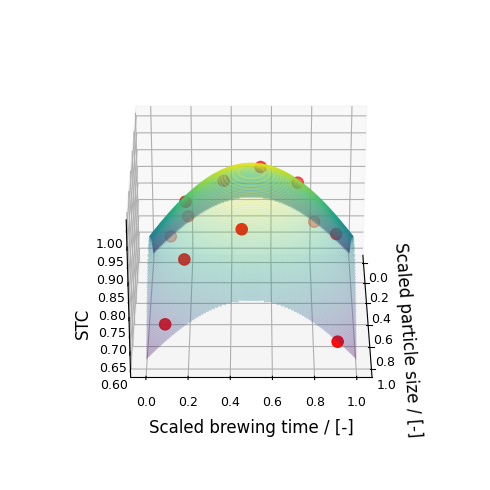

In [7]:
# Plot the ground truth function with our sample data
figname = 'Figure_2a'
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(projection='3d')
ax.contour(X, T, STC, 100, alpha=0.3)
ax.scatter(x, t, STC_samples, s=65, c='r')
ax.set_xlabel('Scaled particle size / [-]', fontsize=fontsize_text, labelpad=10)
ax.set_ylabel('Scaled brewing time / [-]', fontsize=fontsize_text, labelpad=10)
ax.set_zlabel('STC', fontsize=fontsize_text, rotation=90, labelpad=10)
ax.xaxis.set_tick_params(labelsize=fontsize_ticks)
ax.yaxis.set_tick_params(labelsize=fontsize_ticks)
ax.zaxis.set_tick_params(labelsize=fontsize_ticks)
ax.set_box_aspect(aspect=None, zoom=0.78)
plt.tight_layout()

# Make a video
if makevideo:
    # Save figure normally
    # plt.savefig(f'./{figname}.png', dpi=DPI)
    # Rotate figure and save frames
    for angle in list(np.linspace(0,360,int(360/video_angle_veocity))):
        ax.view_init(30, angle)
        # plt.draw() # Only needed in non-interactive mode (.py file)
        # plt.pause(.001) # Only needed in non-interactive mode (.py file)
        plt.savefig(f'./{figname}_{angle}.png', dpi=DPI)
    frames = []
    import imageio
    for angle in list(np.linspace(0,360,int(360/video_angle_veocity))):
        image = imageio.v2.imread(f'./{figname}_{angle}.png')
        frames.append(image)
    imageio.mimsave(f'.{figname}_gif.gif', # output gif
                    frames,          # array of input frames
                    fps = 5)         # optional: frames per second
    print('GIF saved!')
else:
    plt.savefig(f'./{figname}.png', dpi=DPI)
    plt.show()

In [ ]:
figname = 'Figure_2b'
fig = plt.figure()
ax = fig.gca()
CM=ax.contourf(X, T, STC, 100, alpha=0.5, levels=50, linestyles='solid')
cbar = fig.colorbar(CM)
cbar.ax.set_ylabel('STC', fontsize=fontsize_text, rotation=90, labelpad=10)
ax.scatter(x, t, s=65, c='r', label='Samples')
ax.set_xlabel('Scaled particle size / [-]', fontsize=fontsize_text, labelpad=10)
ax.set_ylabel('Scaled brewing time / [-]', fontsize=fontsize_text, labelpad=10)
ax.xaxis.set_tick_params(labelsize=fontsize_ticks)
ax.yaxis.set_tick_params(labelsize=fontsize_ticks)
ax.legend()
plt.tight_layout()
plt.savefig(f'./{figname}.png', dpi=DPI)

In [ ]:
inputs = np.array([x, t]).T
outputs = np.array(STC_samples)
print(f'[+] Shape of inputs: {inputs.shape}')
print(f'[+] Shape of outputs: {outputs.shape}')

In [ ]:
# Import the package
from pysr import PySRRegressor

# Instantiate the regressor
model = PySRRegressor(  niterations=100, population_size=150,
                        binary_operators=["*", "-"], unary_operators=["square", "exp"],
                        loss="f(x, y) = (x - y)^2", # Use a custom loss function
                        complexity_of_operators = {"square": 1, "exp": 1}, # Set the complexity of the operators
                        complexity_of_constants=0.5, # Set the complexity of the constants
                        complexity_of_variables=1, # Set the complexity of the variables
                        maxsize=12, # Allow greater complexity
                        maxdepth=6) # Avoid deep nesting

In [ ]:
model.fit(inputs, outputs)

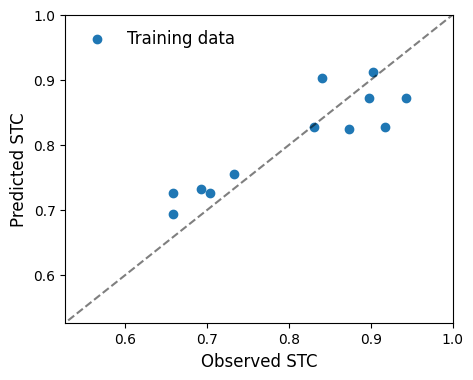

In [12]:
figname = 'Figure_3'
plt.figure()
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.scatter(outputs, model.predict(inputs), label='Training data')
plt.xlabel('Observed STC', fontsize=fontsize_text)
plt.ylabel('Predicted STC', fontsize=fontsize_text)
plt.xlim([np.min(outputs)*0.8, 1])
plt.ylim([np.min(outputs)*0.8, 1])
plt.legend(fontsize=12, frameon=False)
plt.savefig(f'./{figname}.png', dpi=DPI)
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(outputs, model.predict(inputs))
print(f'[+] Best identified model (LaTeX): {model.latex()}')
print(f'[+] R2 score: {r2}')

In [ ]:
# Get a meshgrid for the samples (smaller than above)
X, T = np.meshgrid(np.linspace(xbounds[0], xbounds[1], len(x)), np.linspace(tbounds[0], tbounds[1], len(t)))
STCpred = np.zeros([len(x), len(t)])

# Extract each
for i in range(len(x)):
    for j in range(len(t)):
        datapoint = np.array([X[i,j], T[i,j]]).reshape(1,-1)
        STCpred[i,j] = model.predict(X=datapoint)[0]

# Plot
figname = 'Figure_4'
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(projection='3d')
ax.contour(X, T, STCpred, 100, alpha=0.3)
ax.scatter(x, t, STC_samples, s=65, c='r')
ax.set_xlabel('Scaled particle size / [-]', fontsize=fontsize_text, labelpad=10)
ax.set_ylabel('Scaled brewing time / [-]', fontsize=fontsize_text, labelpad=10)
ax.set_zlabel('STC', fontsize=fontsize_text, rotation=90, labelpad=10)
ax.xaxis.set_tick_params(labelsize=fontsize_ticks)
ax.yaxis.set_tick_params(labelsize=fontsize_ticks)
ax.zaxis.set_tick_params(labelsize=fontsize_ticks)
ax.set_box_aspect(aspect=None, zoom=0.78)
plt.tight_layout()

# Make a video
if makevideo:
    # Save figure normally
    plt.savefig(f'./{figname}.png', dpi=DPI)
    # Rotate figure and save frames
    for angle in list(np.linspace(0,360,int(360/video_angle_veocity))):
        ax.view_init(30, angle)
        # plt.draw() # Only needed in non-interactive mode (.py file)
        # plt.pause(.001) # Only needed in non-interactive mode (.py file)
        plt.savefig(f'./{figname}_{angle}.png', dpi=DPI)
    frames = []
    import imageio
    for angle in list(np.linspace(0,360,int(360/video_angle_veocity))):
        image = imageio.v2.imread(f'./{figname}_{angle}.png')
        frames.append(image)
    imageio.mimsave(f'./{figname}_gif.gif', # output gif
                    frames,          # array of input frames
                    fps = 5)         # optional: frames per second
else:
    plt.savefig(f'./{figname}.png', dpi=DPI)
    plt.show()

# (Optional) Exploring square and triangle Ising models

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand

from tqdm import tqdm
from typing import Union, Dict, Callable

import math
import time

In [16]:
#@title Square Ising Model

class IsingSim():

  """This class performs Ising model simulations on a 2D grid. Interaction parameters are given by a matrix at each lattice site.
  Field dependence is not supported at this time but will be in due course. The simulator outputs configurations after equlibrium
  as well as the trajectories, if specifically requested.
  Inputs:
    - N : (integer) - Size of lattice will be N^2. Only 2D square lattice is supported at this stage.
    - J_mat: (numpy matrix of shape(5,5)) - entries being floats for interaction parameters. Self-interaction (middle element of matrix)=0.
    - T: (float) - Reduced temperature for simulation
    - save_trajectories: (Boolean) - whether to save trajectories, or only final state. Default False.
    - eqSteps: (integer) number of Monte-Carlo steps for equlibration before simulation starts. Default 750. AKA 'burn-in'.
    - mcSteps: (integer) number of Monte-Carlo for simulation. Default 750.
  Outputs: Several outputs are available, including trajectories (if called), configurations (i.e., the 2D states) and configurations histograms.
  These can be obtained by calling methods self.configurations(), self.histograms() and self.trajectories()"""

  def __init__(self, N = 40, J_mat = None, T = 2.7, save_trajectories = False,
               eqSteps = 750, mcSteps = 750):
    self.N = N

    #If no J matrix is provided we default to isotropic J interaction with NN with value 0.5
    if np.array(J_mat).all() == None:
      J_mat = np.zeros((5,5))
      J_mat[1,2] = J_mat[2,1] = J_mat[2,3] = J_mat[3,2] = 0.5 #Defaulting to 0.5 for NN, all others zeroed out.

    self.J_mat = J_mat

    self.save_trajectories = save_trajectories
    self.eqSteps = eqSteps
    self.mcSteps = mcSteps
    self.config = self.initialState(random = False)
    self.T = T

  def initialState(self, random = False):
    ''' Generates a lattice with spin configurations drawn randomly [-1 or 1] if random=True
    Else, the lattice is generated with all sites = 1 '''

    if random==True: state = 2*np.random.randint(2, size=(self.N,self.N))-1
    else: state = np.ones([self.N,self.N])

    return state

  def mcmove(self, config):
    '''Monte Carlo move using Metropolis algorithm '''

    M = 5 #neighborhood size (M^2). Do not change!
    beta = 1.0/self.T

    for i in range(self.N):
      for j in range(self.N):
        J_mat = self.J_mat
        cost = 0.0
        s =  np.copy(config[i, j])

        for p in range(-int(M/2), int(M/2)+1, 1):
          for q in range(-int(M/2), int(M/2)+1, 1):
            cost += 2 * J_mat[int(M/2)+p, int(M/2)+q] * config[(i+p)%self.N,(j+q)%self.N] * config[i,j]

        if cost < 0:
          s *= -1
        elif rand() < np.exp(-cost*beta):
          s *= -1
        config[i, j] = s
    return config


  def calcEnergy(self, config):
    '''Returns the energy of the current configuration'''
    M = 5
    energy = 0.0
    for i in range(len(config)):
      for j in range(len(config)):
        J_mat = self.J_mat #otherwise, no

        s = config[i,j]
        for p in range(-int(M/2), int(M/2)+1, 1):
          for q in range(-int(M/2), int(M/2)+1, 1):
            energy += -J_mat[int(M/2)+p, int(M/2)+q] * config[(i+p)%self.N,(j+q)%self.N] * config[i,j]

    return energy/4.0


  def calcMag(self, config):
    '''Magnetization of a given configuration'''
    return np.sum(config)

  def calcAbsMag(self, config):
    ''' Absolute Magnetization of a given configuration'''
    return (np.abs(np.sum(config)))*1.0

  def performIsingSim(self):

    E1, M1, E2, M2 = 0.0,0.0,0.0,0.0    #These are all the average properties of all MC steps used
    E_traj, M_traj = np.zeros(self.mcSteps), np.zeros(self.mcSteps)

    config = np.copy(self.config)
    T = self.T
    if self.save_trajectories: config_mat = np.zeros([self.mcSteps,self.N,self.N])   #Saving all the configurations


    print('\n---Performing Equlibration---\n')
    for i in tqdm(range(self.eqSteps)):
        config = self.mcmove(config)

    print('\n---Finished...\n----Performing MC Moves----\n')
    for j in tqdm(range(self.mcSteps)):
        config = self.mcmove(config)
        Ene, Mag = self.calcEnergy(config), self.calcAbsMag(config)
        E_traj[j] = self.calcEnergy(config)/(self.N*self.N)
        M_traj[j] = self.calcAbsMag(config)/(self.N*self.N)

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag * Mag
        E2 = E2 + Ene * Ene

        if self.save_trajectories: config_mat[j] = config

    print('Completed. Saving')
    Energy = E1 / (self.mcSteps * self.N * self.N)
    Magnetization = M1 / (self.mcSteps * self.N * self.N)
    n1, n2  = 1.0/(self.mcSteps*self.N*self.N), 1.0/(self.mcSteps*self.mcSteps*self.N*self.N)
    iT = 1.0/self.T
    iT2 = iT*iT
    SpecificHeat = (n1*E2 - n2*E1*E1)*iT2
    Susceptibility = (n1*M2 - n2*M1*M1)*iT
    # SpecificHeat = (E2 / self.mcSteps - E1 * E1 / (self.mcSteps * self.mcSteps)) / (self.N * self.T * self.T)
    # Susceptibility = (M2 / self.mcSteps - M1 * M1 / (self.mcSteps * self.mcSteps)) / (self.N * self.T)

    self.config = config


    if self.save_trajectories:
      results_dict = {'config': config_mat, 'Energy': Energy, 'Magnetization': Magnetization,
      'SpecificHeat': SpecificHeat, 'Susceptibility': Susceptibility, 'E_traj': E_traj,
      'M_traj': M_traj,
      }
    else:
      results_dict = {'Energy': Energy, 'Magnetization': Magnetization,
      'SpecificHeat': SpecificHeat, 'Susceptibility': Susceptibility,
      'E_traj': E_traj, 'M_traj': M_traj,}

    self.results = results_dict

    return 'Completed simulation'

In [ ]:
#@title Triangular Ising model
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
from tqdm import tqdm
from matplotlib import colors
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection


class Tri_IsingSim():

  """This class performs Ising model simulations on a 2D grid. Interaction parameters are given by a matrix at each lattice site.
  Field dependence is not supported at this time but will be in due course. The simulator outputs configurations after equlibrium
  as well as the trajectories, if specifically requested.
  Inputs:
    - N : (integer) - Size of lattice will be N^2 : 2D triangular lattice
    - J_mat: (numpy matrix of shape(3,5)) - entries being floats for interaction parameters. Self-interaction (middle element of matrix)=0.
              or: (list) of size(3,5) with each element belonging to scipy distribution from which to draw J value (for bond disorder)
    - T: (float) - Reduced temperature for simulation
    - save_trajectories: (Boolean) - whether to save trajectories, or only final state. Default False.
    - eqSteps: (integer) number of Monte-Carlo steps for equlibration before simulation starts. Default 750. AKA 'burn-in'.
    - mcSteps: (integer) number of Monte-Carlo for simulation. Default 750.
  Outputs: Several outputs are available, including trajectories (if called), configurations (i.e., the 2D states) and configurations histograms.
  These can be obtained by calling methods self.configurations(), self.histograms() and self.trajectories()"""

  def __init__(self, N = 40, J_mat = None, T = 2.7, save_trajectories = False,
               eqSteps = 750, mcSteps = 750, prop = 0.5):
    self.N = N
    self.prop = prop
    #If no J matrix is provided we default to isotropic J interaction with NN with value 0.5
    if (J_mat).all == None:
      J_mat = np.zeros((3,5))
      J_mat[0,1] = J_mat[0,3] = J_mat[1,0] = J_mat[1,4] = J_mat[2,1] = J_mat[2,3] = 0.5 #Defaulting to 0.5 for NN, all others zeroed out.

    self.J_mat = J_mat
    self.save_trajectories = save_trajectories
    self.eqSteps = eqSteps
    self.mcSteps = mcSteps
    self.config = self.initialState()
    self.T = T

  def initialState(self):
    ''' Generates a lattice with spin configurations drawn randomly [-1 or 1] if random=True
    Else, the lattice is generated with all sites = 1
    Can do better, remove probability and see how you can include numbers'''

    state = np.random.choice([1, -1], size = ([self.N,2*self.N]), p=[self.prop, 1-self.prop])

    for i in range(0,self.N,2):
      for j in range(0,2*self.N,2):
        state[i,j] = 0

    for i in range(1,self.N,2):
      for j in range(1,2*self.N,2):
        state[i,j] = 0


    return state

  def EmptySite(self, row_1, col_1, spin_1, config):
    #You can do better, this takes a lot of time because of intermittent zeros
    row_2, col_2 = row_1, col_1
    spin_2 = spin_1
    while (spin_2*spin_1 != -1.0):
        row_2, col_2     = np.random.randint(0, self.N), np.random.randint(0, 2*self.N)
        spin_2 = config[row_2, col_2]

    return row_2, col_2

  def mcmove(self):
    '''Monte Carlo move using Metropolis algorithm '''
    M = 3 #check whether you can obtain this from J_mat
    T = 5
    beta = 1.0/self.T
    config = self.config
    config_1 = np.where(config == -1, 0.0, config)

    for i in range(self.N):
      for j in range(2*self.N):
        row_1, col_1 = np.random.randint(0, self.N), np.random.randint(0, 2*self.N)
        spin_1 = config[row_1, col_1]

        if(spin_1):
          J_mat = self.J_mat
          row_2, col_2 = np.random.randint(0, self.N), np.random.randint(0, 2*self.N)
          spin_2   = config[row_2, col_2]

          if (spin_2*spin_1 != -1.0):
            (row_2, col_2) = self.EmptySite(row_1, col_1, spin_1, config)
            spin_2 = config[row_2, col_2]

          ini_ene_1, ini_ene_2, fin_ene_1, fin_ene_2 = 0.0,0.0,0.0,0.0

          if spin_1 == 1.0:
              for p in range(-int(M/2), int(M/2)+1, 1):
                for q in range(-int(T/2), int(T/2)+1, 1):
                  ini_ene_1 += -J_mat[int(M/2)+p, int(T/2)+q] * config[(row_1+p)%self.N,(col_1+q)%(2*self.N)] * spin_1
                  ini_ene_2 += -J_mat[int(M/2)+p, int(T/2)+q] * config_1[(row_2+p)%self.N,(col_2+q)%(2*self.N)] * spin_2
                  fin_ene_1 += -J_mat[int(M/2)+p, int(T/2)+q] * config_1[(row_1+p)%self.N,(col_1+q)%(2*self.N)] * spin_2
                  fin_ene_2 += -J_mat[int(M/2)+p, int(T/2)+q] * config[(row_2+p)%self.N,(col_2+q)%(2*self.N)] * spin_1

          if spin_1 == -1.0:
              for p in range(-int(M/2), int(M/2)+1, 1):
                for q in range(-int(T/2), int(T/2)+1, 1):
                  ini_ene_1 += -J_mat[int(M/2)+p, int(T/2)+q] * config_1[(row_1+p)%self.N,(col_1+q)%(2*self.N)] * spin_1
                  ini_ene_2 += -J_mat[int(M/2)+p, int(T/2)+q] * config[(row_2+p)%self.N,(col_2+q)%(2*self.N)] * spin_2
                  fin_ene_1 += -J_mat[int(M/2)+p, int(T/2)+q] * config[(row_1+p)%self.N,(col_1+q)%(2*self.N)] * spin_2
                  fin_ene_2 += -J_mat[int(M/2)+p, int(T/2)+q] * config_1[(row_2+p)%self.N,(col_2+q)%(2*self.N)] * spin_1

          cost = (fin_ene_1 + fin_ene_2) - (ini_ene_1 + ini_ene_2)
          if cost < 0 or (rand() < np.exp(-cost*beta)):
            spin_1 *= -1
            spin_2 *= -1
          config[row_1, col_1], config[row_2, col_2] = spin_1, spin_2

      self.config = config
    return None


  def calcEnergy(self):
    '''Returns the energy of the current configuration'''
    config = self.config
    config_1 = np.where(config == -1, 0.0, config)
    M = 3
    T = 5
    energy = 0.0
    for i in range(self.N):
      for j in range(2*self.N):

        J_mat = self.J_mat #otherwise, no

        s = config[i,j]
        if (s):
            if s == 1.0:
                for p in range(-int(M/2), int(M/2)+1, 1):
                    for q in range(-int(T/2), int(T/2)+1, 1):
                        energy += -J_mat[int(M/2)+p, int(T/2)+q] * config[(i+p)%self.N,(j+q)%(2*self.N)] * config[i,j]

            if s == -1.0:
                for p in range(-int(M/2), int(M/2)+1, 1):
                    for q in range(-int(T/2), int(T/2)+1, 1):
                        energy += -J_mat[int(M/2)+p, int(T/2)+q] * config_1[(i+p)%self.N,(j+q)%(2*self.N)] * config[i,j]
    return energy/4.0


  def calcMag(self):
    '''Magnetization of a given configuration'''
    return float(np.nansum(self.config))

  def calcAbsMag(self):
    ''' Absolute Magnetization of a given configuration'''
    return float(np.abs(np.nansum(self.config)))

  def performIsingSim(self):

    E1, E2 = 0.0,0.0   #These are all the average properties of all MC steps used
    E_traj = np.zeros(self.mcSteps)
    if self.save_trajectories: config_mat = np.zeros([self.mcSteps,self.N,2*self.N])   #Saving all the configurations

    print('\n---Performing Equlibration---\n')
    for i in tqdm(range(self.eqSteps)):
        self.mcmove()

    print('\n---Finished...\n----Performing MC Moves----\n')
    for j in tqdm(range(self.mcSteps)):
        self.mcmove()
        Ene = self.calcEnergy()
        E_traj[j] = Ene/(self.N*self.N)


        E1 = E1 + Ene
        E2 = E2 + Ene * Ene

        if self.save_trajectories: config_mat[j] = self.config

    print('Completed. Saving')
    Energy = E1 / (self.mcSteps * self.N * self.N)
    n1, n2  = 1.0/(self.mcSteps*self.N*self.N), 1.0/(self.mcSteps*self.mcSteps*self.N*self.N)
    iT = 1.0/self.T
    iT2 = iT*iT
    SpecificHeat = (n1*E2 - n2*E1*E1)*iT2
    # SpecificHeat = (E2 / self.mcSteps - E1 * E1 / (self.mcSteps * self.mcSteps)) / (self.N * self.T * self.T)
    # Susceptibility = (M2 / self.mcSteps - M1 * M1 / (self.mcSteps * self.mcSteps)) / (self.N * self.T)




    if self.save_trajectories:
      results_dict = {'config': config_mat, 'Energy': Energy,
      'SpecificHeat': SpecificHeat,
      'E_traj': E_traj}
    else:
      results_dict = {'Energy': Energy, 'E_traj': E_traj,
      'SpecificHeat': SpecificHeat,
    }

    self.results = results_dict

  def plot_config(self, config, figsize=(7, 7)):
    """
    Plots the spin configuration on a hexagonal lattice.

    Parameters:
        self: Object containing lattice size (self.N)
        config: 2D numpy array representing the spin configuration
        figsize: Tuple, figure size
    """
    fig, ax = plt.subplots(figsize=figsize)

    # Hexagonal grid parameters
    dx = 1.0  # Spacing in x-direction
    dy = np.sqrt(3) / 2  # Spacing in y-direction (height of hexagon)
    radius = dx / 2.2  # Size of the hexagons

    # Define colormap
    cmap = colors.ListedColormap(['blue', 'red'])  # Blue = -1, Red = +1
    norm = colors.BoundaryNorm([-1, 0, 1], cmap.N)

    patches = []
    values = []

    for i in range(self.N):
        for j in range(self.N):
            x_pos = j * dx  # Horizontal position
            y_pos = i * dy  # Vertical position

            # Offset every other row (hexagonal staggering)
            if j % 2 == 1:
                y_pos += dy / 2

            polygon = mpatches.RegularPolygon((x_pos, y_pos), numVertices=6, radius=radius, orientation=np.radians(0))
            patches.append(polygon)
            values.append(config[i, j])  # Assign spin values

    # Create patch collection
    collection = PatchCollection(patches, cmap=cmap, norm=norm, alpha=1.0)
    collection.set_array(np.array(values))

    ax.add_collection(collection)

    # Adjust plot limits to fit hexagonal tiling
    ax.set_xlim(-dx, self.N * dx)
    ax.set_ylim(-dy, self.N * dy)
    ax.set_aspect('equal')  # Ensure correct aspect ratio
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

Full grid evaluation for 20x20 1D Ising model - Square Model

Recommended parameters:
- 20x20 field
- 500 steps for equilibration
- 500 steps for computation

In [ ]:
results_dict = {}
approx_ys = np.zeros(1)
time_eval = np.zeros(1)

J_mat = np.array([[0,0,0,0,0],
                  [0,0,1,0,0],
                  [0,1,0,1,0],
                  [0,0,1,0,0],
                  [0,0,0,0,0]])

start_time = time.time()

np.random.seed(0)
sq_sim = IsingSim(N = 20, J_mat = J_mat, T = 12.7, save_trajectories=True, eqSteps = 50, mcSteps = 50)  # Intializing the object
sq_sim.performIsingSim()   # Running the sim
end_time = time.time()
time_eval = end_time-start_time

results_dict[0] = {'sim': sq_sim.results,}
approx_ys[0] = results_dict[0]['sim']['SpecificHeat']
plt.imshow(results_dict[0]['sim']['config'][-1])
plt.show()

Full grid evaluation for 20x20 1D Ising model - Triangular Model

Recommended parameters:
- 20x20 field
- 500 steps for equilibration
- 500 steps for computation

In [ ]:
results_dict_tri = {}
approx_ys_tri = np.zeros(1)
time_eval = np.zeros(1)

J_mat = np.array([[0,-1,0,-1,0],
                  [1,0,0,0,1],
                  [0,-1,0,-1,0]])

np.random.seed(0)
tri_sim = Tri_IsingSim(N = 20, J_mat = J_mat, T = 0.2, save_trajectories=True, # Intializing the object
                       eqSteps = 150, mcSteps = 150,
                       prop = 0.5)  # Proportion of the sites occupied

tri_sim.performIsingSim()   # Running the sim

results_dict_tri[0] = {'sim': tri_sim.results,}
approx_ys_tri[0] = results_dict_tri[0]['sim']['SpecificHeat']
tri_sim.plot_config(results_dict_tri[0]['sim']['config'][-1])
plt.show()

# PySr on Square Ising Model

Using Symbolic Regression in PySR package by Miles Cranmer to explore Ising model.

- The original PySR paper is: https://arxiv.org/pdf/2305.01582.pdf
- The PySR GitHub repository is: https://github.com/MilesCranmer/PySR
- The excellent docs for PySR are: https://astroautomata.com/PySR/

- The Ising model is by Rama Vasudevan, vasudevanrk@ornl.gov
- This model has been used in several of our publications, including https://pubs.aip.org/aip/jap/article/128/16/164304/568362/Exploration-of-lattice-Hamiltonians-for-functional

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand

from tqdm import tqdm
from typing import Union, Dict, Callable

import math
import time

In [ ]:
# @title Ising model code
class IsingSim():

  """This class performs Ising model simulations on a 2D grid. Interaction parameters are given by a matrix at each lattice site.
  Field dependence is not supported at this time but will be in due course. The simulator outputs configurations after equlibrium
  as well as the trajectories, if specifically requested.
  Inputs:
    - N : (integer) - Size of lattice will be N^2. Only 2D square lattice is supported at this stage.
    - J_mat: (numpy matrix of shape(5,5)) - entries being floats for interaction parameters. Self-interaction (middle element of matrix)=0.
    - T: (float) - Reduced temperature for simulation
    - save_trajectories: (Boolean) - whether to save trajectories, or only final state. Default False.
    - eqSteps: (integer) number of Monte-Carlo steps for equlibration before simulation starts. Default 750. AKA 'burn-in'.
    - mcSteps: (integer) number of Monte-Carlo for simulation. Default 750.
  Outputs: Several outputs are available, including trajectories (if called), configurations (i.e., the 2D states) and configurations histograms.
  These can be obtained by calling methods self.configurations(), self.histograms() and self.trajectories()"""

  def __init__(self, N = 40, J_mat = None, T = 2.7, save_trajectories = False,
               eqSteps = 750, mcSteps = 750):
    self.N = N

    #If no J matrix is provided we default to isotropic J interaction with NN with value 0.5
    if np.array(J_mat).all() == None:
      J_mat = np.zeros((5,5))
      J_mat[1,2] = J_mat[2,1] = J_mat[2,3] = J_mat[3,2] = 0.5 #Defaulting to 0.5 for NN, all others zeroed out.

    self.J_mat = J_mat

    self.save_trajectories = save_trajectories
    self.eqSteps = eqSteps
    self.mcSteps = mcSteps
    self.config = self.initialState(random = False)
    self.T = T

  def initialState(self, random = False):
    ''' Generates a lattice with spin configurations drawn randomly [-1 or 1] if random=True
    Else, the lattice is generated with all sites = 1 '''

    if random==True: state = 2*np.random.randint(2, size=(self.N,self.N))-1
    else: state = np.ones([self.N,self.N])

    return state

  def mcmove(self, config):
    '''Monte Carlo move using Metropolis algorithm '''

    M = 5 #neighborhood size (M^2). Do not change!
    beta = 1.0/self.T

    for i in range(self.N):
      for j in range(self.N):
        J_mat = self.J_mat
        cost = 0.0
        s =  np.copy(config[i, j])

        for p in range(-int(M/2), int(M/2)+1, 1):
          for q in range(-int(M/2), int(M/2)+1, 1):
            cost += 2 * J_mat[int(M/2)+p, int(M/2)+q] * config[(i+p)%self.N,(j+q)%self.N] * config[i,j]

        if cost < 0:
          s *= -1
        elif rand() < np.exp(-cost*beta):
          s *= -1
        config[i, j] = s
    return config


  def calcEnergy(self, config):
    '''Returns the energy of the current configuration'''
    M = 5
    energy = 0.0
    for i in range(len(config)):
      for j in range(len(config)):
        J_mat = self.J_mat #otherwise, no

        s = config[i,j]
        for p in range(-int(M/2), int(M/2)+1, 1):
          for q in range(-int(M/2), int(M/2)+1, 1):
            energy += -J_mat[int(M/2)+p, int(M/2)+q] * config[(i+p)%self.N,(j+q)%self.N] * config[i,j]

    return energy/4.0


  def calcMag(self, config):
    '''Magnetization of a given configuration'''
    return np.sum(config)

  def calcAbsMag(self, config):
    ''' Absolute Magnetization of a given configuration'''
    return (np.abs(np.sum(config)))*1.0

  def performIsingSim(self):

    E1, M1, E2, M2 = 0.0,0.0,0.0,0.0    #These are all the average properties of all MC steps used
    E_traj, M_traj = np.zeros(self.mcSteps), np.zeros(self.mcSteps)

    config = np.copy(self.config)
    T = self.T
    if self.save_trajectories: config_mat = np.zeros([self.mcSteps,self.N,self.N])   #Saving all the configurations


    print('\n---Performing Equlibration---\n')
    for i in tqdm(range(self.eqSteps)):
        config = self.mcmove(config)

    print('\n---Finished...\n----Performing MC Moves----\n')
    for j in tqdm(range(self.mcSteps)):
        config = self.mcmove(config)
        Ene, Mag = self.calcEnergy(config), self.calcAbsMag(config)
        E_traj[j] = self.calcEnergy(config)/(self.N*self.N)
        M_traj[j] = self.calcAbsMag(config)/(self.N*self.N)

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag * Mag
        E2 = E2 + Ene * Ene

        if self.save_trajectories: config_mat[j] = config

    print('Completed. Saving')
    Energy = E1 / (self.mcSteps * self.N * self.N)
    Magnetization = M1 / (self.mcSteps * self.N * self.N)
    n1, n2  = 1.0/(self.mcSteps*self.N*self.N), 1.0/(self.mcSteps*self.mcSteps*self.N*self.N)
    iT = 1.0/self.T
    iT2 = iT*iT
    SpecificHeat = (n1*E2 - n2*E1*E1)*iT2
    Susceptibility = (n1*M2 - n2*M1*M1)*iT
    # SpecificHeat = (E2 / self.mcSteps - E1 * E1 / (self.mcSteps * self.mcSteps)) / (self.N * self.T * self.T)
    # Susceptibility = (M2 / self.mcSteps - M1 * M1 / (self.mcSteps * self.mcSteps)) / (self.N * self.T)

    self.config = config


    if self.save_trajectories:
      results_dict = {'config': config_mat, 'Energy': Energy, 'Magnetization': Magnetization,
      'SpecificHeat': SpecificHeat, 'Susceptibility': Susceptibility, 'E_traj': E_traj,
      'M_traj': M_traj,
      }
    else:
      results_dict = {'Energy': Energy, 'Magnetization': Magnetization,
      'SpecificHeat': SpecificHeat, 'Susceptibility': Susceptibility,
      'E_traj': E_traj, 'M_traj': M_traj,}

    self.results = results_dict

    return 'Completed simulation'

## Evaluation

In [ ]:
lb = 0
ub = 3
N_total = 201

#bounds = np.array((lb, ub), dtype=float)
xs = np.linspace(lb, ub, N_total)

Full grid evaluation for 20x20 1D Ising model - Square Model

Recommended parameters:
- 20x20 field
- 500 steps for equilibration
- 500 steps for computation

However, if you are impatient, run (10x10, 50, 50)

In [ ]:
Jx = xs

results_dict = {}
approx_ys = np.zeros(xs.shape[0])
approx_ys1 = np.zeros(xs.shape[0])
approx_ys2 = np.zeros(xs.shape[0])

time_eval = np.zeros(xs.shape[0])

for i in range(0, Jx.shape[0]):
    J_mat = np.array([[0,0,0,0,0],
                      [0,0,Jx[i],0,0],
                      [0,Jx[i],0,Jx[i],0],
                      [0,0,Jx[i],0,0],
                      [0,0,0,0,0]])
    print("Evaluation " +str (i+1) +" of " +str(N_total))
    start_time = time.time()
    np.random.seed(0)
    sq_sim = IsingSim(N = 10, J_mat = J_mat, T = 2.7, save_trajectories=True, eqSteps = 50, mcSteps = 50)  # Intializing the object
    sq_sim.performIsingSim()   # Running the sim
    end_time = time.time()
    time_eval[i]= end_time-start_time
    print("Time (s) to complete simulation " +str(i+1)+ ": " +str(time_eval[i]))
    results_dict[i] = {'sim': sq_sim.results,}

    approx_ys[i] = results_dict[i]['sim']['SpecificHeat']
    approx_ys1[i] = results_dict[i]['sim']['Magnetization']
    approx_ys2[i] = results_dict[i]['sim']['Susceptibility']

    plt.imshow(results_dict[i]['sim']['config'][-1])
    plt.show()

In [ ]:
plt.plot(xs, approx_ys, "k", label="Specific Heat")
plt.legend(loc="best")
np.mean(time_eval), np.std(time_eval)

# Symbolic Regression


Here, we explore the symbolic regression over the Ising model predictions.

## Specific Heat

In [ ]:
inputs2 = xs.reshape(-1, 1)
outputs2 = approx_ys

In [ ]:
# Import the package
from pysr import PySRRegressor

# Instantiate the regressor
model = PySRRegressor(  niterations=100, population_size=150,
                        binary_operators=["*", "-", "+", "/"], unary_operators=["square", "exp", "log", "tanh"],
                        loss="f(x, y) = (x - y)^2", # Use a custom loss function
                        complexity_of_operators = {"square": 1, "exp": 1}, # Set the complexity of the operators
                        complexity_of_constants=0.5, # Set the complexity of the constants
                        complexity_of_variables=1, # Set the complexity of the variables
                        maxsize=12, # Allow greater complexity
                        maxdepth=6) # Avoid deep nesting

In [27]:
model.fit(inputs2, outputs2)

/usr/local/lib/python3.12/dist-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 9.540e+04
Progress: 96 / 3100 total iterations (3.097%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           2.789e+00  0.000e+00  y = x₀
2           1.190e-02  5.457e+00  y = tanh(square(-0.29442))
4           1.082e-02  4.767e-02  y = tanh(square(x₀)) * 0.11189
5           7.437e-03  3.745e-01  y = square(x₀ / exp(x₀))
8           7.171e-03  1.217e-02  y = x₀ * ((x₀ / 0.68018) / square(exp(x₀)))
9           7.090e-03  1.128e-02  y = tanh(x₀) * (x₀ - (tanh(x₀) * x₀))
10          3.403e-03  7.342e-01  y = ((x₀ + -0.49049) / exp(square(x₀))) * (x₀ / 0.82307)
11          2.897e-03  1.609e-01  y = ((square(x₀) + -0.26888) / exp(square(x₀))) * (x₀ / 1....
                                      4244)
──────────────────────────────────────────────────────────

[ Info: Final population:
[ Info: Results saved to:


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                                 x0   
	1        5.457292                          tanh(square(-0.29442084))   
	2        0.047671                      tanh(square(x0)) * 0.11189467   
	3        0.374463                               square(x0 / exp(x0))   
	4        0.012166         x0 * ((x0 / 0.68017626) / square(exp(x0)))   
	5        0.011279                  tanh(x0) * (x0 - (tanh(x0) * x0))   
	6  >>>>  0.734164  ((x0 + -0.49049333) / exp(square(x0))) * (x0 /...   
	7        0.160902  ((square(x0) + -0.26887742) / exp(square(x0)))...   
	
	       loss  complexity  
	0  2.789404           1  
	1  0.011897           2  
	2  0.010815           4  
	3  0.007437           5  
	4  0.007171           8  
	5  0.007090           9  
	6  0.003403          10  
	7  0.002897          11  
]

  - outputs/20260211_080721_ghgdAx/hall_of_fame.csv


In [ ]:
plt.figure()
plt.scatter(outputs2, model.predict(inputs2), label='Training data')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.xlim([np.min(outputs2)*0.8, np.max(outputs2)*1.2])
plt.ylim([np.min(outputs2)*0.8, np.max(outputs2)*1.2])
plt.show()

In [ ]:
plt.figure()
plt.scatter(inputs2, model.predict(inputs2), label='Training data')
plt.scatter(inputs2,outputs2, label='Training data')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(outputs2, model.predict(inputs2))
print(f'Best identified model (LaTeX): {model.latex()}')
print(f'R2 score: {r2}')

## Magnetization

In [ ]:
inputs2 = xs.reshape(-1, 1)
outputs2 = approx_ys1

In [ ]:
# Import the package
from pysr import PySRRegressor

# Instantiate the regressor
model = PySRRegressor(  niterations=100, population_size=150,
                        binary_operators=["*", "-", "+", "/"], unary_operators=["square", "exp", "log", "tanh"],
                        loss="f(x, y) = (x - y)^2", # Use a custom loss function
                        complexity_of_operators = {"square": 1, "exp": 1}, # Set the complexity of the operators
                        complexity_of_constants=0.5, # Set the complexity of the constants
                        complexity_of_variables=1, # Set the complexity of the variables
                        maxsize=12, # Allow greater complexity
                        maxdepth=6) # Avoid deep nesting

In [ ]:
model.fit(inputs2, outputs2)

In [ ]:
plt.figure()
plt.scatter(outputs2, model.predict(inputs2), label='Training data')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.xlim([np.min(outputs2)*0.8, np.max(outputs2)*1.2])
plt.ylim([np.min(outputs2)*0.8, np.max(outputs2)*1.2])
plt.show()

In [ ]:
plt.figure()
plt.scatter(inputs2, model.predict(inputs2), label='Training data')
plt.scatter(inputs2,outputs2, label='Training data')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.show()

In [36]:
from sklearn.metrics import r2_score
r2 = r2_score(outputs2, model.predict(inputs2))
print(f'Best identified model (LaTeX): {model.latex()}')
print(f'R2 score: {r2}')

Best identified model (LaTeX): \tanh{\left(\left(\left(0.443 - x_{0}\right)^{2} - -0.315\right)^{2} \right)}
R2 score: 0.9652854209867925


## Susceptibility

In [ ]:
inputs2 = xs.reshape(-1, 1)
outputs2 = approx_ys2

In [ ]:
# Import the package
from pysr import PySRRegressor

# Instantiate the regressor
model = PySRRegressor(  niterations=100, population_size=150,
                        binary_operators=["*", "-", "+", "/"], unary_operators=["square", "exp", "log", "tanh"],
                        loss="f(x, y) = (x - y)^2", # Use a custom loss function
                        complexity_of_operators = {"square": 1, "exp": 1}, # Set the complexity of the operators
                        complexity_of_constants=0.5, # Set the complexity of the constants
                        complexity_of_variables=1, # Set the complexity of the variables
                        maxsize=12, # Allow greater complexity
                        maxdepth=6) # Avoid deep nesting

In [ ]:
model.fit(inputs2, outputs2)

In [ ]:
plt.figure()
plt.scatter(outputs2, model.predict(inputs2), label='Training data')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.xlim([np.min(outputs2)*0.8, np.max(outputs2)*1.2])
plt.ylim([np.min(outputs2)*0.8, np.max(outputs2)*1.2])
plt.show()

In [ ]:
plt.figure()
plt.scatter(inputs2, model.predict(inputs2), label='Training data')
plt.scatter(inputs2,outputs2, label='Training data')
plt.xlabel('Observed', fontsize=12)
plt.ylabel('Predicted', fontsize=12)
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(outputs2, model.predict(inputs2))
print(f'Best identified model (LaTeX): {model.latex()}')
print(f'R2 score: {r2}')

In [43]:
model.equations_

,complexity,loss,equation,score,sympy_format,lambda_format
0,1,2.807503,x0,0.000000e+00,x0,PySRFunction(X=>x0)
1,2,0.431345,tanh(0.40656784),1.873144e+00,tanh(0.40656784),PySRFunction(X=>tanh(0.40656784))
2,3,0.431344,exp(-1.0150356) + 0.023454923,4.636665e-08,0.023454923 + exp(-1.0150356),PySRFunction(X=>0.023454923 + exp(-1.0150356))
3,4,0.369473,square(tanh(x0 + -2.4557266)),1.548289e-01,tanh(x0 - 2.4557266)**2,PySRFunction(X=>tanh(x0 - 2.4557266)**2)
4,6,0.243978,0.8980186 - tanh(square(x0 + -1.0234703)),2.074999e-01,0.8980186 - tanh((x0 - 1.0234703)**2),PySRFunction(X=>0.8980186 - tanh((x0 - 1.02347...
5,8,0.172046,1.162954 - tanh(square((x0 + -1.0824636) / 0.4...,1.746577e-01,1.162954 - tanh(5.10030574992333*(x0 - 1.08246...,PySRFunction(X=>1.162954 - tanh(5.100305749923...
6,10,0.140743,square(tanh(square(x0 * x0)) * square(2.362528...,1.004136e-01,(2.3625283 - x0)**4*tanh(x0**4)**2,PySRFunction(X=>(2.3625283 - x0)**4*tanh(x0**4...
7,11,0.132971,square(square((x0 / 1.0377171) + -2.2840528) *...,5.680611e-02,(x0/1.0377171 - 2.2840528)**4*tanh(x0**4)**2,PySRFunction(X=>(x0/1.0377171 - 2.2840528)**4*...


In [44]:
model.equations_['equation'][6]

'square(tanh(square(x0 * x0)) * square(2.3625283 - x0))'